# 🛒SHOPPER SPECTRUM: CUSTOMER SEGMENTATION AND PRODUCT                            RECOMMENDATIONS IN E-COMMERCE 
                     

## 1.IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2.LOAD DATASET

In [3]:
df = pd.read_csv('online_retail.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3.UNDERASTANDING DATASET

### SHAPE

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### STATISTICAL SUMMARY

In [7]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### CHECKING MISSING VALUES

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### CHECKING DUPLICATE VALUES

In [9]:
df.duplicated().sum()

np.int64(5268)

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## 4.DATA PROCESSING

### 4.1.REMOVING ROWS WITH MISSING CUSTOMERID

In [12]:
df.dropna(subset=['CustomerID'], inplace=True)

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 4.2.DROPPING DUPLICATED DATA

In [15]:
df.duplicated().sum()

np.int64(5225)

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

np.int64(0)

### 4.3.EXCLUDE CANCELLED INVOICES(INVOICE_NO STARTING WITH 'C')

In [18]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [19]:
df['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
581491      1
581487      1
581483      1
581479      1
536380      1
Name: count, Length: 18536, dtype: int64

### 4.4.REMOVE NEGATIVE OR ZERO QUANTITIES AND PRICES

In [20]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


## 5.EXPLORATORY DATA ANALYSIS(EDA)

### 5.1.IMPORTING LIBRARIES

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

### 5.2.DATA VISUALIZATION

### 5.2.1.ANALYZE TRANSACTION VOLUME BY COUNTRY

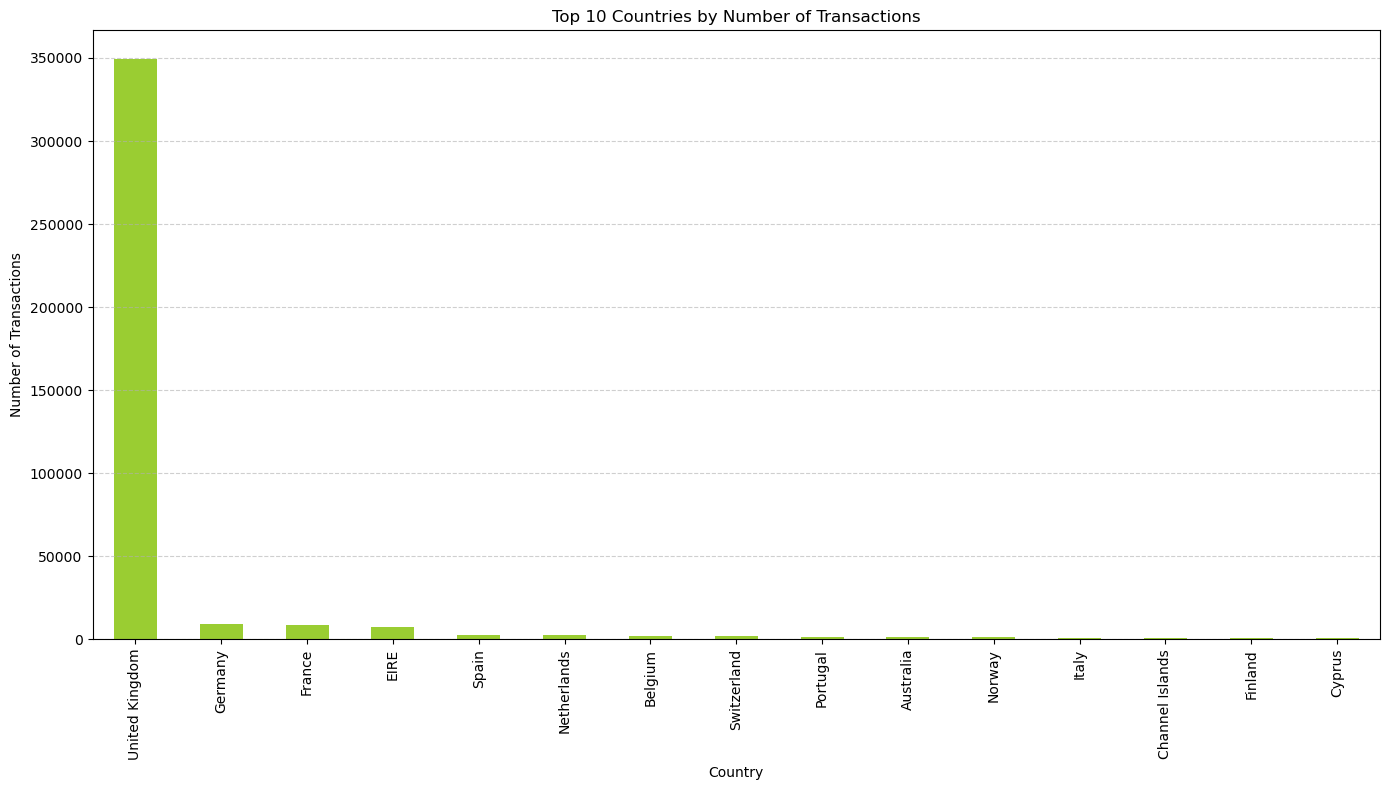

In [23]:
country_orders = df['Country'].value_counts().head(15).sort_values(ascending=False)

#colors = cm.rainbow(np.linspace(0, 1, 10))

plt.figure(figsize=(14, 8))
country_orders.plot(kind='bar', color='yellowgreen')
plt.title('Top 10 Countries by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("top_countries")
plt.show()

### Insights:

United Kingdom is the primary market.This suggests the dataset is primarily based on a UK-centric e-commerce business, with the majority of its customers or orders located there.

Other European countries contribute smaller but noticeable shares, especially Germany, France, and Ireland. These might represent international customers or smaller export markets.

Non-European countries (e.g., Australia) appear but with very low volume.

### 5.2.2.TOP SELLING PRODUCTS

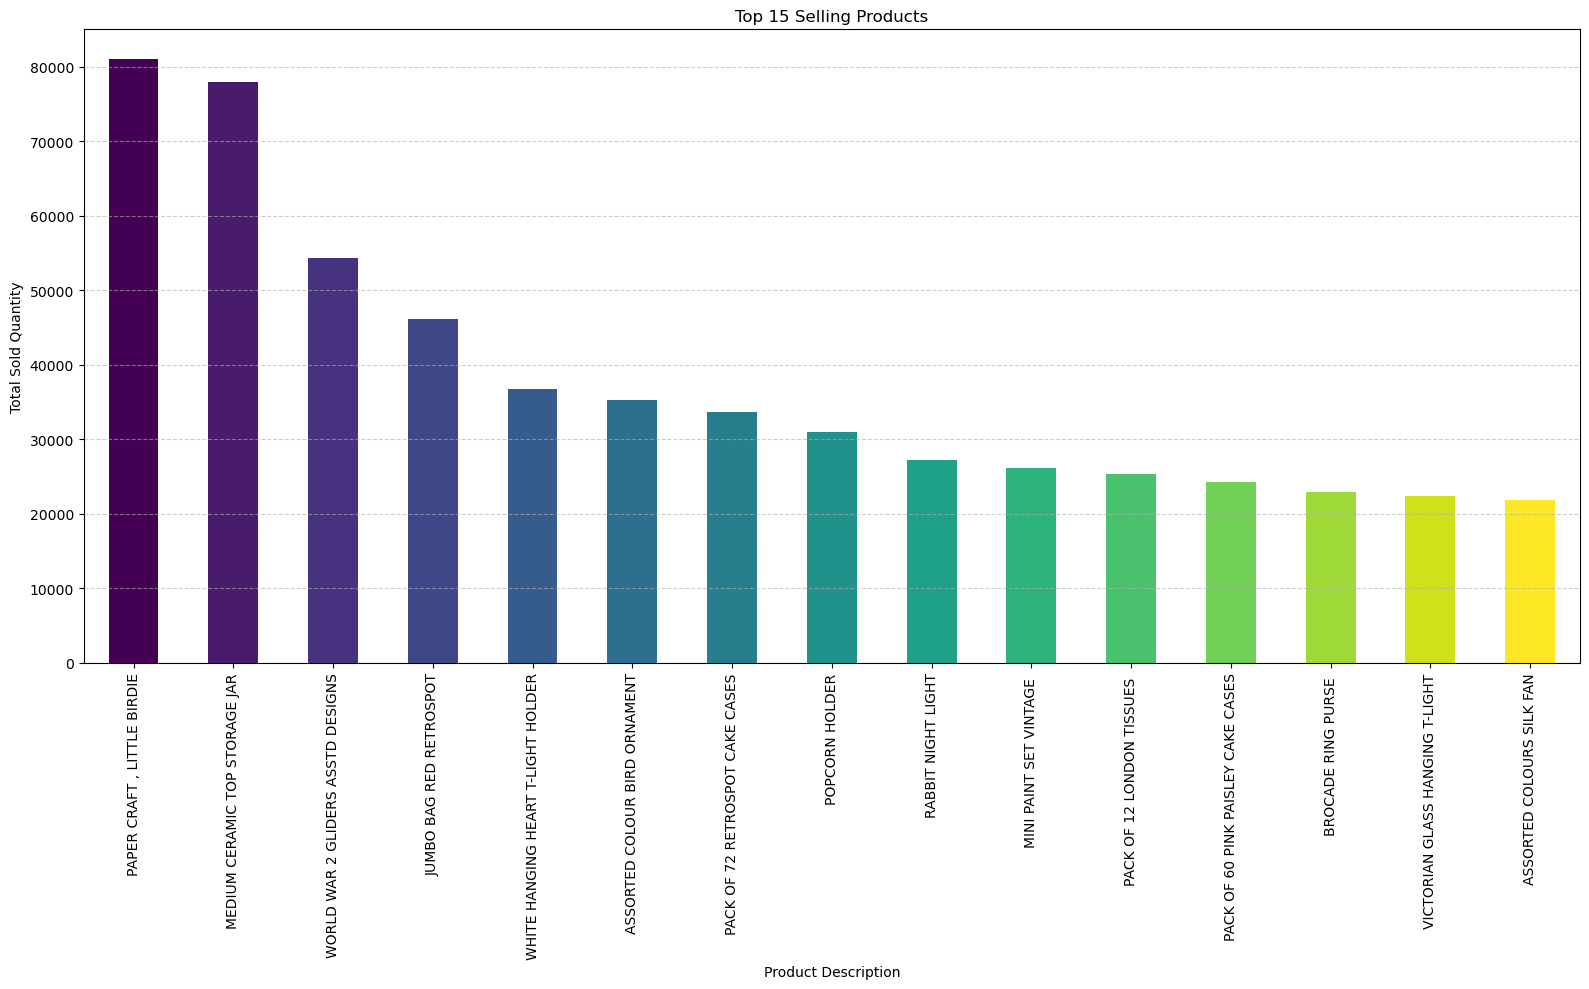

In [24]:
# Get top 15 selling products by quantity
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

# Use colormap
colors = cm.viridis(np.linspace(0, 1, 15))

plt.figure(figsize=(16, 10))
top_selling_products.plot(kind='bar', color=colors)
plt.title('Top 15 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Sold Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("top_sold")
plt.show()


### INSIGHS:

PAPER CRAFT, LITTLE BIRDIE is the top-selling product with ~80,000 units.

Followed by MEDIUM CERAMIC TOP STORAGE JAR, WORLD WAR 2 GLIDERS ASSORTED DESIGNS, JUMBO BAG RED RETROSPOT, etc.

The top products are mostly affordable, everyday or decorative items.

### 5.2.3.PURCHASE TRENDS OVER TIME

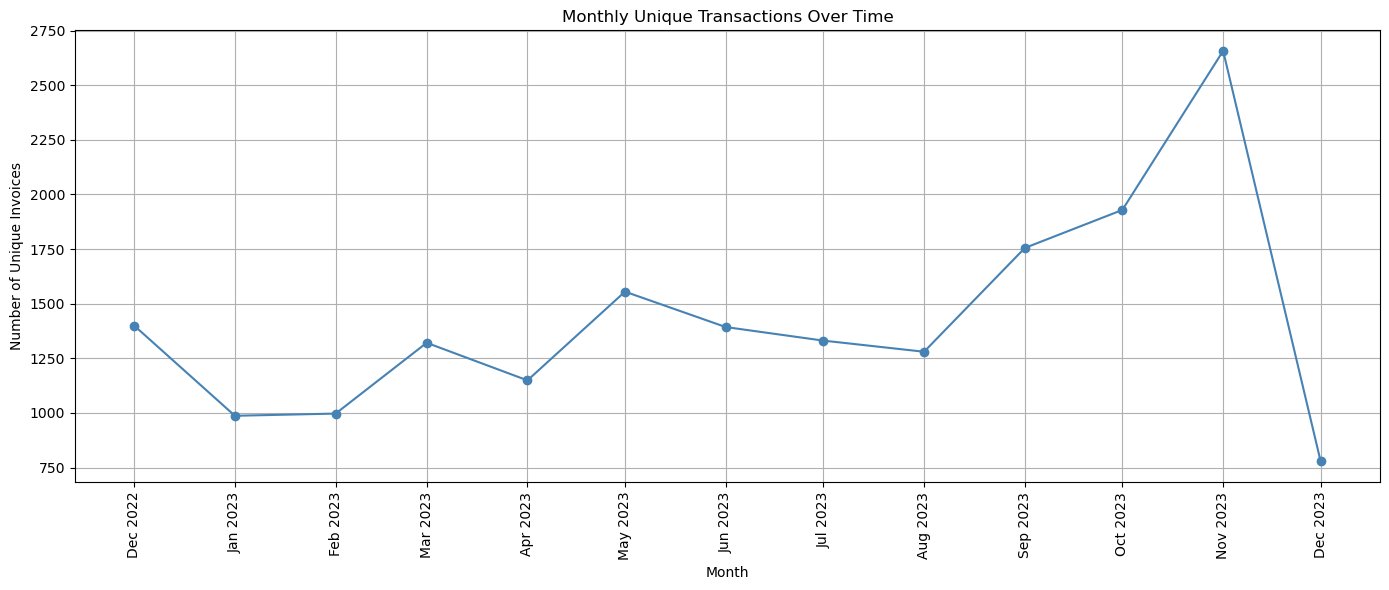

InvoiceMonth
2022-12-01    1400
2023-01-01     987
2023-02-01     997
2023-03-01    1321
2023-04-01    1149
2023-05-01    1555
2023-06-01    1393
2023-07-01    1331
2023-08-01    1280
2023-09-01    1755
2023-10-01    1929
2023-11-01    2657
2023-12-01     778
Freq: MS, Name: InvoiceNo, dtype: int64


In [25]:

import matplotlib.dates as mdates

# Convert InvoiceDate to datetime and extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group and convert PeriodIndex to Timestamp
monthly_sales = df.groupby('InvoiceMonth')['InvoiceNo'].nunique()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot with full month labels
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='steelblue')
plt.title('Monthly Unique Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Unique Invoices')

# Show one label per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig("purchase")
plt.show()

print(monthly_sales)

### INSIGHS:

1.There’s noticeable fluctuation throughout the year — some months have fewer transactions, while others spike.

2. The highest transaction volume occurs in November 2023, with around 2,700 unique invoices — likely reflecting holiday or Black Friday–related sales.

3.Smaller peaks appear in May 2023 and September–October 2023, suggesting promotional or seasonal buying trends.

4.January–February 2023 show the lowest transaction counts (~1,000 invoices), which is common in post-holiday periods when spending typically dips.

### 5.2.4.INSPECT MONETARY DISTRIBUTION PER TRANSACTION AND CUSTOMER

Text(0.5, 0, 'Invoice Value (₹)')

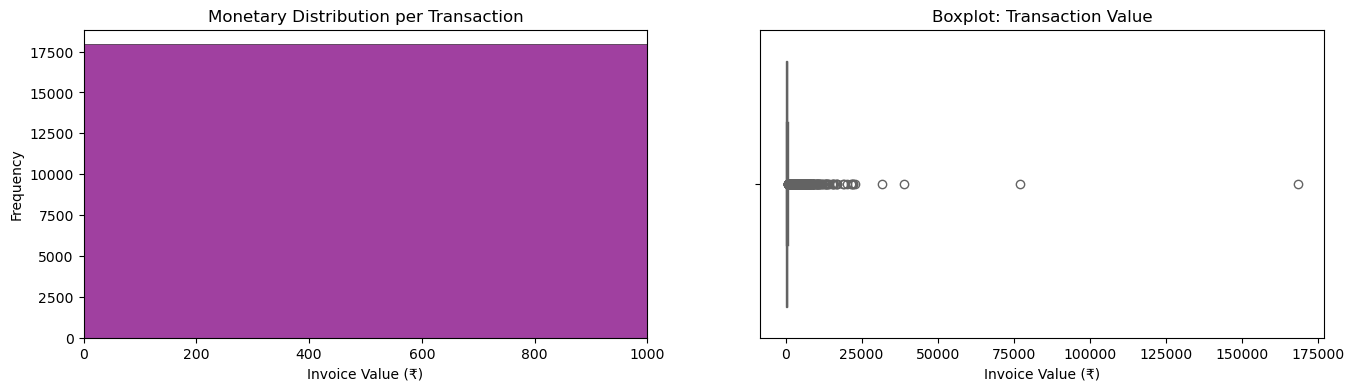

In [26]:
# --- Total price per line item ---
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# --- Total per Transaction (Invoice) ---
invoice_value = df.groupby('InvoiceNo')['TotalPrice'].sum()

# --- Total per Customer ---
customer_value = df.groupby('CustomerID')['TotalPrice'].sum()

# --- Plotting ---
plt.figure(figsize=(16, 4))

# 1. Histogram - Transaction Value
plt.subplot(1, 2, 1)
sns.histplot(invoice_value, bins=100, color='purple')
plt.title('Monetary Distribution per Transaction')
plt.xlabel('Invoice Value (₹)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Focus on typical range

# 2. Boxplot - Transaction Value
plt.subplot(1, 2, 2)
sns.boxplot(x=invoice_value, color='orchid')
plt.title('Boxplot: Transaction Value')
plt.xlabel('Invoice Value (₹)')


### INSIGHTS:

### Transaction Value Analysis

1.The left panel shows the distribution of invoice values per transaction. The majority of transactions fall within a lower value range, indicating that high-value transactions are rare in the dataset.

2.The right panel presents a boxplot for transaction values. The very long "whiskers" and visible outliers suggest that while most transactions are small, there are some transactions with exceptionally high values. This distribution is highly right-skewed with significant outliers.


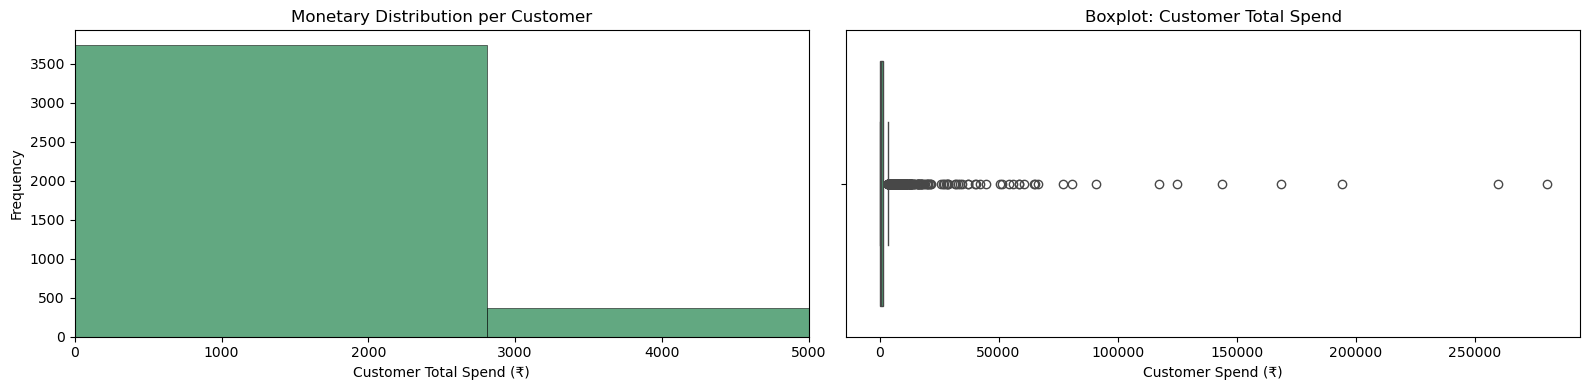

In [27]:
# --- Total price per line item ---
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# --- Total per Transaction (Invoice) ---
invoice_value = df.groupby('InvoiceNo')['TotalPrice'].sum()

# --- Total per Customer ---
customer_value = df.groupby('CustomerID')['TotalPrice'].sum()

# --- Plotting ---
plt.figure(figsize=(16, 4))

# 1. Histogram - Customer Value
plt.subplot(1, 2, 1)
sns.histplot(customer_value, bins=100, color='seagreen')
plt.title('Monetary Distribution per Customer')
plt.xlabel('Customer Total Spend (₹)')
plt.ylabel('Frequency')
plt.xlim(0, 5000)

# 2. Boxplot - Customer Value
plt.subplot(1, 2, 2)
sns.boxplot(x=customer_value, color='mediumseagreen')
plt.title('Boxplot: Customer Total Spend')
plt.xlabel('Customer Spend (₹)')

plt.tight_layout()
plt.savefig("monetary inspection")
plt.show()


### INSIGHTS:

### Customer Spend Analysis

1.The left panel shows the distribution of total spending per customer. Most customers have relatively low total spend, with a few customers accounting for much higher total spending.

2.The right panel is a boxplot showing the total spend per customer. There are many outliers, and the distribution appears right-skewed, emphasizing that a small number of customers contribute to a disproportionately high share of total revenue.


### 5.2.5.RFM DISTRIBUTIONS

In [28]:
# Reference date: one day after last transaction

reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

In [29]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


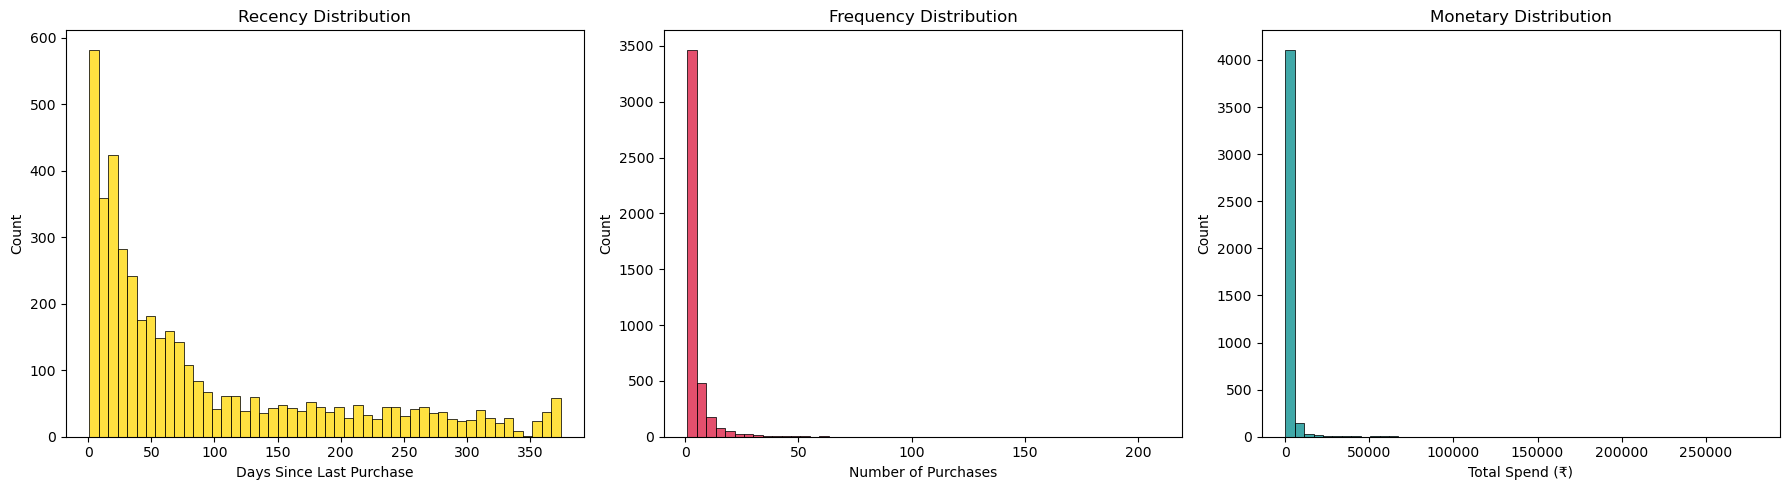

In [30]:

plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, color='#FFD700')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, color='#DC143C')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, color='#008B8B')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend (₹)')

plt.tight_layout()
plt.savefig("rfm distributions")
plt.show()


### INSIGHTS:

### Recency Distribution

Most customers made a purchase recently (low recency values are most common). As recency increases, the number of customers decreases, showing that recent shoppers are more prevalent than long-inactive ones.

### Frequency Distribution
The middle panel displays the distribution of the number of purchases per customer.

The majority of customers made only one or a few purchases, while a smaller number of customers made frequent purchases, leading to a long-tailed distribution with very few high-frequency buyers.

### Monetary Distribution

Most customers spend a relatively low amount, while a few customers account for very high total spends, resulting in a highly right-skewed distribution.

### 5.2.6.ELBOW CURVE AND SILHOUETTE SCORE FOR CLUSTER SELECTION

#### Preprocess RFM for Clustering

In [31]:
from sklearn.preprocessing import StandardScaler

# Scale the RFM values
# Scaling ensures each feature contributes equally to the distance metric used by K-Means.
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [32]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Elbow method to find optimal k
inertia = []
silhouette = []# Within-Cluster Sum of Squares

# Try K values from 2 to 10
# The model is trained iteratively for values of k = 2 to 10 to find the optimal number of clusters.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    #Two popular methods are used to identify the best number of cluster
    inertia.append(kmeans.inertia_)  # Inertia 
    silhouette.append(silhouette_score(rfm_scaled, kmeans.labels_))   #silhouette_score



#### INERTIA

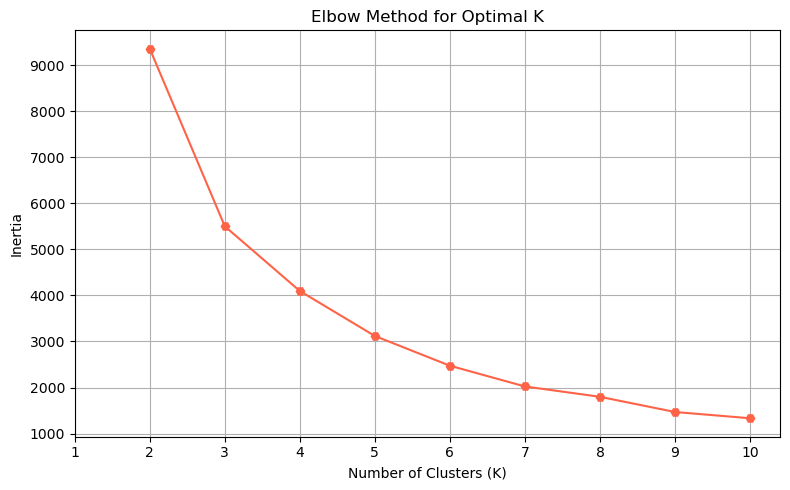

In [33]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='H', color='tomato')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow curve")
plt.show()

There’s a sharp drop in inertia from K=2 to K=4.

After K=4 or K=5, the curve starts to flatten.

Therefore, the optimal number of clusters (K) is likely around 4.

#### we can clearly see that the "elbow" occurs at K=4, where the rate of decrease in inertia slows down significantly.

#### SILHOUETTE SCORES

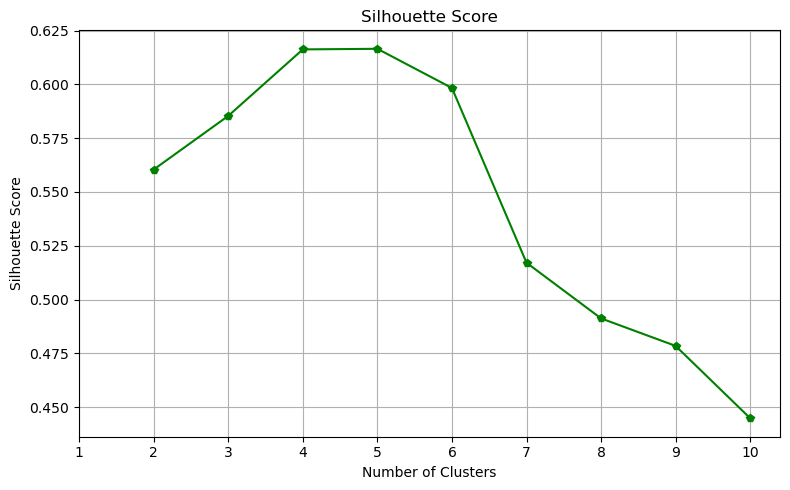

In [34]:

# Plot silhouette_scores

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette, marker='p', color='green')
plt.title("Silhouette Score")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.savefig("silhouette")
plt.show()


The Silhouette Score increases from K=2 to K=4 or 5, reaching a peak around K=4–5.

After K=5, the score drops sharply, meaning more clusters start to reduce cohesion and increase overlap.

### 5.2.7.CUSTOMER CLUSTER PROFILES

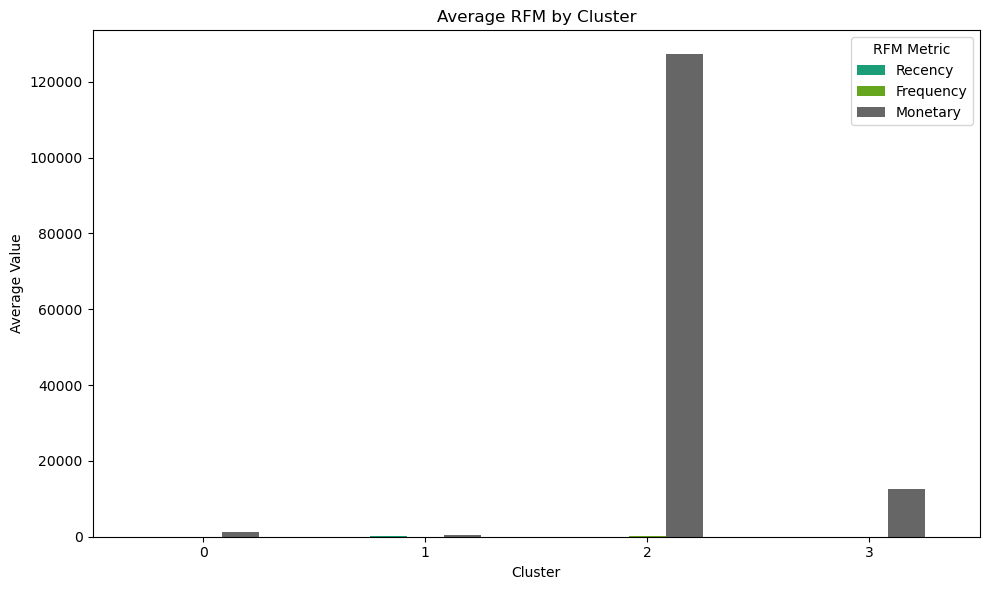

In [35]:

# Apply k-means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Average RFM per cluster (only RFM columns)
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Visualize
cluster_summary.plot(kind='bar', figsize=(10, 6), colormap='Dark2')
plt.title('Average RFM by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='RFM Metric')
plt.tight_layout()
plt.savefig("customer clusters")
plt.show()


### Cluster 2

Has an extremely high Monetary value, meaning customers in this group spend significantly more than others.

They are likely our top or premium customers.

### Cluster 3

Has a moderately high Monetary value, but less than Cluster 2.

Likely represents loyal and valuable customers, but not as elite as Cluster 2.

### Clusters 0 and 1

Have very low Monetary and Frequency values and possibly high Recency, meaning they purchase less often and spend less.

They could be inactive or low-value customers.

### 5.2.8.PRODUCT RECOMMENDATION HEATMAP

#### CREATE A USER-ITEM MATRIX

In [36]:
# Create pivot table: rows = customers, columns = products, values = purchase count
item_matrix = df.pivot_table(index='CustomerID',
                              columns='StockCode',
                              values='Quantity',
                              aggfunc='sum').fillna(0)

#### COMPUTE PRODUCT SIMILARITY(COSINE SIMILARITY)

In [37]:

from sklearn.metrics.pairwise import cosine_similarity

# Transpose so products are rows
product_similarity = cosine_similarity(item_matrix.T)

# Convert to DataFrame with StockCodes as index/columns
product_similarity_df = pd.DataFrame(product_similarity,
                              index=item_matrix.columns,
                              columns=item_matrix.columns)

In [38]:
product_similarity_df

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.001550,0.000990,0.0,0.000000,0.853895,0.052149,0.021922,0.003033,...,0.000000,0.0,0.000000,0.0,0.000000,0.038765,0.0,0.000310,0.0,0.074260
10080,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.004958,0.020672,0.011878,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000007,0.0,0.000000
10120,0.001550,0.000000,1.000000,0.004911,0.0,0.000000,0.001397,0.027555,0.010435,0.009977,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.007736,0.0,0.000332
10123C,0.000990,0.000000,0.004911,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.000000,0.000000,0.000000,1.0,0.491784,0.001099,0.014985,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.038765,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.064845,0.153788,0.033250,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000441,0.0,0.000955
DOT,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.153670,0.041252,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000
M,0.000310,0.000007,0.007736,0.000000,0.0,0.000000,0.000133,0.004341,0.005002,0.004154,...,0.000036,0.0,0.000004,0.0,0.001605,0.000441,0.0,1.000000,0.0,0.000474


#### HEATMAP

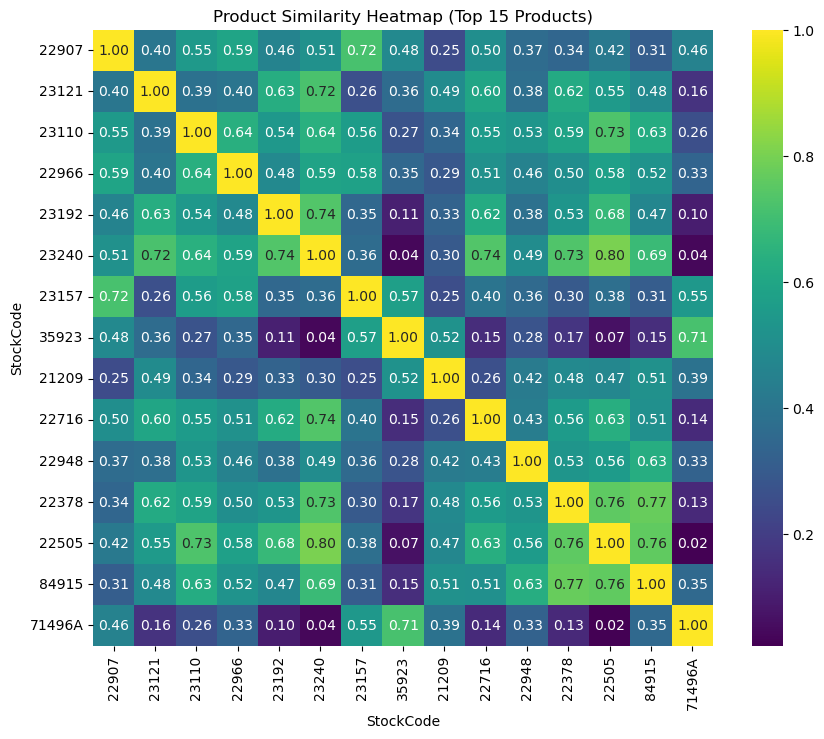

In [39]:

# Heatmap of top N similar products
top_n = 15
top_products = product_similarity_df.sum().sort_values(ascending=False).head(top_n).index


plt.figure(figsize=(10, 8))
sns.heatmap(product_similarity_df.loc[top_products, top_products], cmap='viridis', annot=True, fmt=".2f")
plt.title('Product Similarity Heatmap (Top 15 Products)')
plt.savefig("correlation")
plt.show()

### Color scale (0 to 1):

The color intensity represents the similarity score (correlation value) between the two products:

Bright Yellow (≈ 1.0) → Products are very similar — they’re often bought together or by similar customers.

Green (≈ 0.6–0.8) → Products are moderately similar — some overlap in buying patterns.

Blue or Purple (≈ 0.1–0.3) → Products are not similar — rarely bought by the same customers.


#### For example:

#### Products 23240 and 22505:
The cell value between them is ~0.80, meaning these two items are **strongly related** — customers who bought 23240 often also bought 22505.

#### Products 23121 and 71496A:
The cell is dark purple (~0.16) → very low similarity — these two products are **rarely** purchased together.

#### Products 23157 and 22907:
The similarity is 0.72, which is quite high — these are **likely complementary** products.

## 6.CLUSTERING METHODOLOGY

### 6.1.FEATURE ENGINEERING

#### CREATE TOTAL PRICE COLUMN

In [40]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#### SET REFERENCE DATE(DAY AFTER LAST PUTCHASE)

In [41]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

#### RMF CALCULATION

In [42]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})


#### RENAME COLUMNS

In [43]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

In [44]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### NOTE:

**Recency: Lower is better (purchased recently)**

**Frequency: Higher is better (more visits)**

**Monetary: Higher is better (spent more)**

### 6.2.STANDARDIZE/NORMALIZE THE RFM VALUES

In [45]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

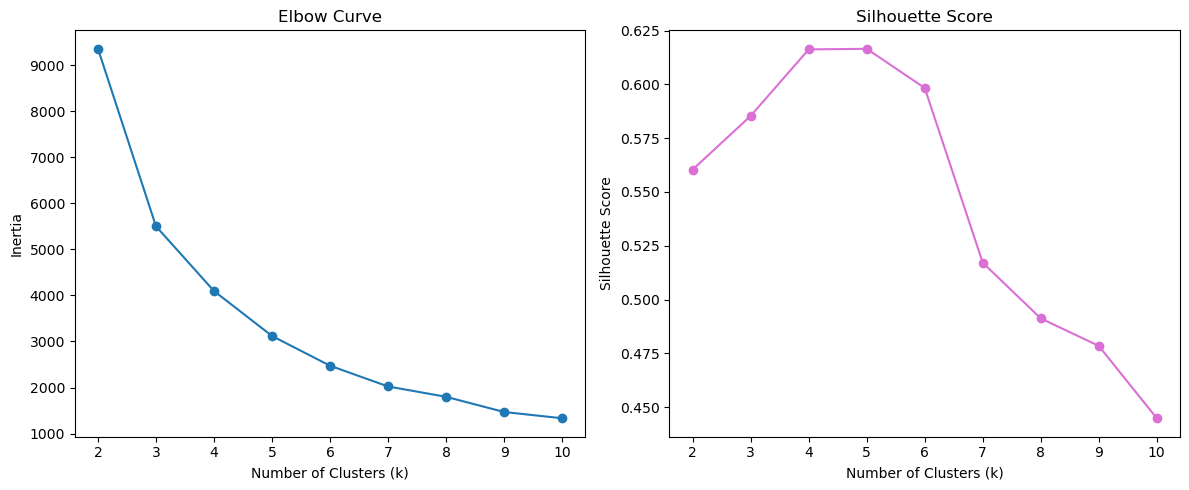

In [46]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(rfm_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, labels))

# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, marker='o', color='orchid')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## 7.CLUSTERING

### 7.1.APPLY K-MEANS ALGORITHM

In [47]:
# Final model
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Average RFM per cluster
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

# Count of customers
cluster_profiles['NumCustomers'] = rfm['Cluster'].value_counts().sort_index()

print(cluster_profiles)



         Recency  Frequency  Monetary  NumCustomers
Cluster                                            
0           43.7        3.7    1353.6          3054
1          248.1        1.6     478.8          1067
2            7.4       82.5  127188.0            13
3           15.5       22.3   12690.5           204


### OBSERVATION:
Cluster 2: Top VIP customers — purchase often, recently, and spend heavily

Cluster 3:Loyal regulars — frequent buyers with good spend

Cluster 0:Occasional buyers — moderate engagement

Cluster 1:At-risk / inactive customers — haven’t purchased recently

### LABEL SEGMENTS

In [48]:
cluster_labels = {
    0: 'High-Value',
    1: 'Regular',
    2: 'Occasional',
    3: 'At-Risk'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)


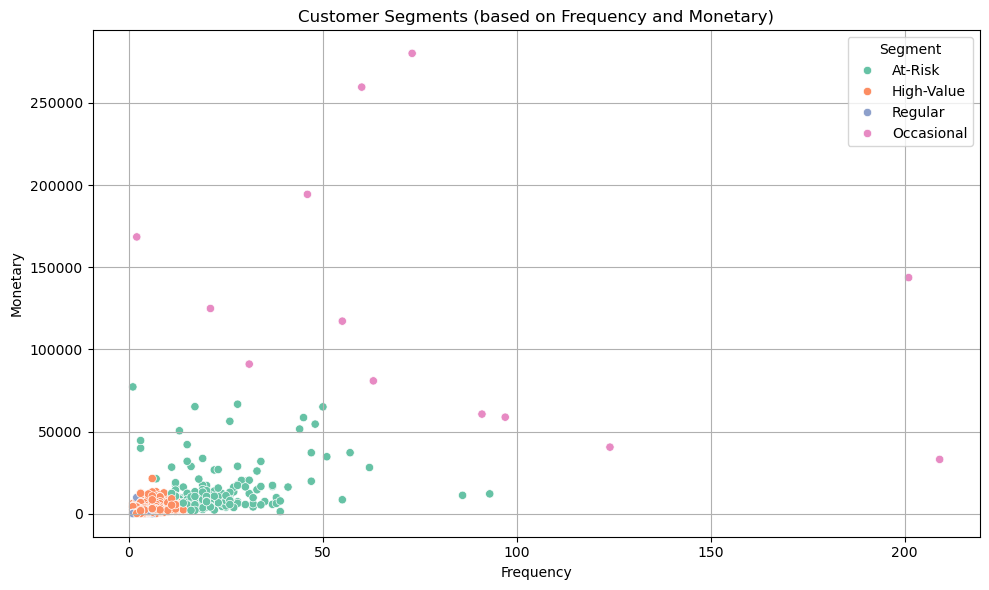

In [49]:
# 2D Scatter Plot: Frequency vs Monetary
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2')
plt.title("Customer Segments (based on Frequency and Monetary)")
plt.grid(True)
plt.tight_layout()
plt.savefig("customer seg fm")
plt.show()



It helps visualize how often customers buy and how much they spend, making it easier to identify loyal shoppers, top spenders, and those who may need re-engagement strategies.

| Color     | Segment        | Meaning                                                                                    |
| --------- | -------------- | ------------------------------------------------------------------------------------------ |
| 🟢 Green  | **At-Risk**    | Used to buy often or spend more, but their activity has dropped — they need re-engagement. |
| 🟠 Orange | **High-Value** | Top customers — spend a lot and buy frequently. Most profitable segment.                   |
| 🔵 Blue   | **Regular**    | Steady customers — buy occasionally, moderate spenders.                                    |
| 🟣 Pink   | **Occasional** | Rare buyers — low frequency but sometimes make high-value purchases.                       |


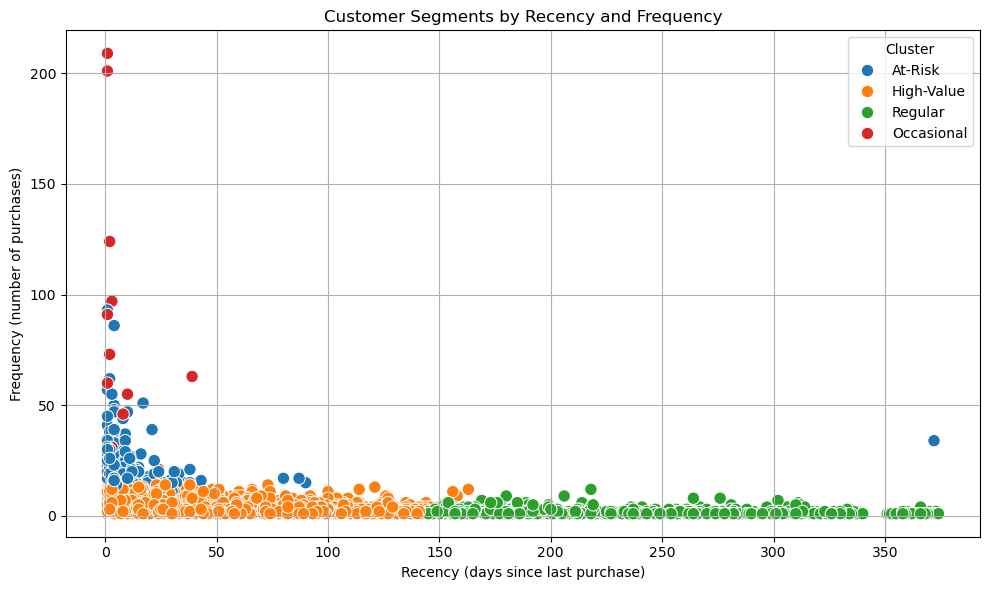

In [50]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='tab10', s=80)
plt.title('Customer Segments by Recency and Frequency')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig("customer segmentation rf")
plt.show()


#### X-axis – Recency:
Number of days since the customer’s last purchase.
→ Lower values = more recent shoppers (active customers).
→ Higher values = customers who haven’t purchased in a long time.

#### Y-axis – Frequency:
Number of purchases made by the customer.
→ Higher values = more loyal or frequent buyers.


| Color     | Segment        | Meaning                                                                                     |
| --------- | -------------- | ------------------------------------------------------------------------------------------- |
| 🔵 Blue   | **At-Risk**    | Used to buy frequently but haven’t purchased recently — may need reactivation.              |
| 🟠 Orange | **High-Value** | Loyal and active customers who purchase often and recently — best segment.                  |
| 🟢 Green  | **Regular**    | Customers who buy occasionally and haven’t bought very recently — steady buyers.            |
| 🔴 Red    | **Occasional** | Rare but sometimes high-frequency buyers — may purchase only for specific needs or seasons. |



Each color represents a different customer group — High-Value, At-Risk, Regular, and Occasional.
It helps identify loyal customers, inactive ones, and those who may need re-engagement, enabling more targeted marketing and retention strategies.

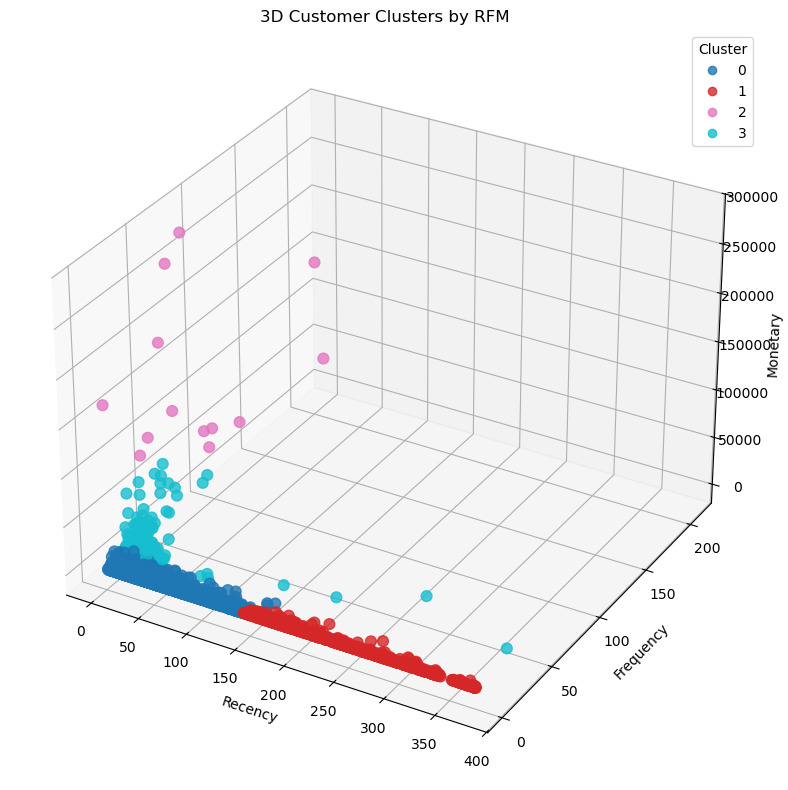

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster'],
    cmap='tab10',
    s=60,
    alpha=0.8
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Clusters by RFM')

plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.savefig("3d")
plt.show()


X-axis – Recency: How recently the customer made a purchase (lower = more recent).

Y-axis – Frequency: How often they purchase (higher = more frequent).

Z-axis – Monetary: How much money they spend (higher = more valuable).


The plot provides a 3D perspective of customer behavior, showing how spending, loyalty, and recency interact.Businesses can target each cluster differently:

Reward high-value customers (Cluster 2).

Re-engage inactive customers (Cluster 1).

Encourage regular buyers (Cluster 0, 3) with loyalty programs.

## 8.PRODUCT RECOMMENDATION SYSTEM

### 8.1.CREATING PIVOT TABLE FOR CUSTOMERS VS PRODUCTS

In [52]:
item_matrix = df.pivot_table(index='CustomerID',
                              columns='StockCode',
                              values='Quantity',
                              aggfunc='sum').fillna(0)

### 8.2.COMPUTING PRODUCT COSINE SIMILARITY

In [53]:
# Transpose so products are rows
product_similarity = cosine_similarity(item_matrix.T)

# Convert to DataFrame with StockCodes as index/columns
product_similarity_df = pd.DataFrame(product_similarity,
                              index=item_matrix.columns,
                              columns=item_matrix.columns)

In [54]:
# Create StockCode → Product Description lookup
product_names = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

### RECOMMENDATION

In [55]:
def recommend_by_product_name(product_name, top_n=5):
    # 1. Search for the StockCode using partial name match
    def get_code_by_name(name):
        for code, desc in product_names.items():
            if name.lower() in desc.lower():
                return code
        return None

    # 2. Recommend based on similar products
    def recommend_products(stock_code, top_n):
        if stock_code not in product_similarity_df:
            return [f"StockCode {stock_code} not found in similarity matrix."]
        
        sim_scores = product_similarity_df[stock_code].sort_values(ascending=False).drop(stock_code)
        top_similar = sim_scores.head(top_n).index
        return [f"{code} - {product_names.get(code, 'Unknown Product')}" for code in top_similar]

    # 3. Main logic: get StockCode, recommend
    code = get_code_by_name(product_name)
    if code:
        print(f"Recommendations for: {product_names[code]} ({code})")
        return recommend_products(code, top_n)
    else:
        return [f"Product name '{product_name}' not found."]

In [56]:
recommendations = recommend_by_product_name("RED HANGING HEART T-LIGHT HOLDER")
for rec in recommendations:
    print(rec)

Recommendations for: RED HANGING HEART T-LIGHT HOLDER (21733)
22117 - METAL SIGN HER DINNER IS SERVED 
22479 - DAISY GARDEN MARKER
21897 - POTTING SHED CANDLE CITRONELLA
21898 - POTTING SHED ROSE CANDLE
82551 - LAUNDRY 15C METAL SIGN


In [57]:
import joblib

# Save similarity matrix and product name dictionary
joblib.dump(product_similarity_df, "product_similarity.pkl")
joblib.dump(product_names, "product_names.pkl")
print("Recommendation model saved.")

Recommendation model saved.


In [58]:
# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")
print("Saved: scaler.pkl & kmeans_model.pkl")

Saved: scaler.pkl & kmeans_model.pkl
